# Explore here

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [3]:
df.shape
#FILAS, COLUMNAS

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# ELIMINO DUPLICADOS Y MODIFICO EL DF CON EL "TRUE"
df.drop_duplicates(inplace=True)

In [6]:
# CREAR DOS LISTAS, UNA CON LAS COLUMNAS EN LAS QUE TIENEN DATOS DE TIPO NUMERICOS,
# LA SEGUNDA, CON LAS COLUMNAS EN LAS CUALES TIENEN DATOS DE TIPO TEXTO:

numeric_cols = []
categoric_cols = []

column_names = df.columns.tolist()

for i in range(len(column_names)):
    col_name = column_names[i]
    if pd.api.types.is_numeric_dtype(df[col_name]):
        numeric_cols.append(col_name)
    elif pd.api.types.is_string_dtype(df[col_name]) or pd.api.types.is_object_dtype(df[col_name]):
        categoric_cols.append(col_name)

print("Numericas:", numeric_cols)
print("Categoricas:", categoric_cols)

Numericas: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categoricas: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [7]:
# DETERMINAR EL PRECIO MAS ALTO DE CASA, ASI COMO LA MEDIA DE ELLAS:

min_price_house = df[df['price'] > 0]['price'].min()
max_price_house = df['price'].max()
mean_price_house = df['price'].mean()

print(f"El precio más bajo es: {min_price_house}")
print(f"El precio más alto es: {max_price_house}")
print(f"El precio medio es: {mean_price_house:.2f}")

El precio más bajo es: 10
El precio más alto es: 10000
El precio medio es: 152.72


In [8]:
# DETERMINAR QUE CASA ES MAS CARA CON RESPECTO A LAS NOCHES OCUPADAS:

# Asegurarse de que 'minimum_nights' no sea cero para evitar división por cero
df_filtered = df[df['minimum_nights'] > 0].copy()

df_filtered['price_per_night'] = df_filtered['price'] / df_filtered['minimum_nights']

# busca el precio por noche más alto y luego extrae todos los datos de la propiedad
# que tiene ese precio máximo.
most_expensive_per_night = df_filtered.loc[df_filtered['price_per_night'].idxmax()]

# .loc:
# Accede a un grupo de filas y columnas por etiqueta, y al pasarle el índice que idxmax() encontró,
# .loc selecciona la fila completa (todas sus columnas) que corresponde a ese índice.

# idxmax():
# Este método se aplica a la serie de la columna 'price_per_night' agregada al df central.
# Luego, devuelve el índice de la primera aparición del valor máximo en esa columna.
# En otras palabras, te dice la 'posición' de la fila que tiene el precio por noche más alto.

print("La propiedad más cara por noche es:")
print(most_expensive_per_night[['name', 'price', 'minimum_nights', 'price_per_night']])

La propiedad más cara por noche es:
name               Film Location
price                       8000
minimum_nights                 1
price_per_night           8000.0
Name: 4377, dtype: object


In [9]:
# ELIMINANDO INFORMACION QUE NO ES IMPORTANTE:

df.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df.head()

# utilizando axis=0 elimina a lo largo de las columnas

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


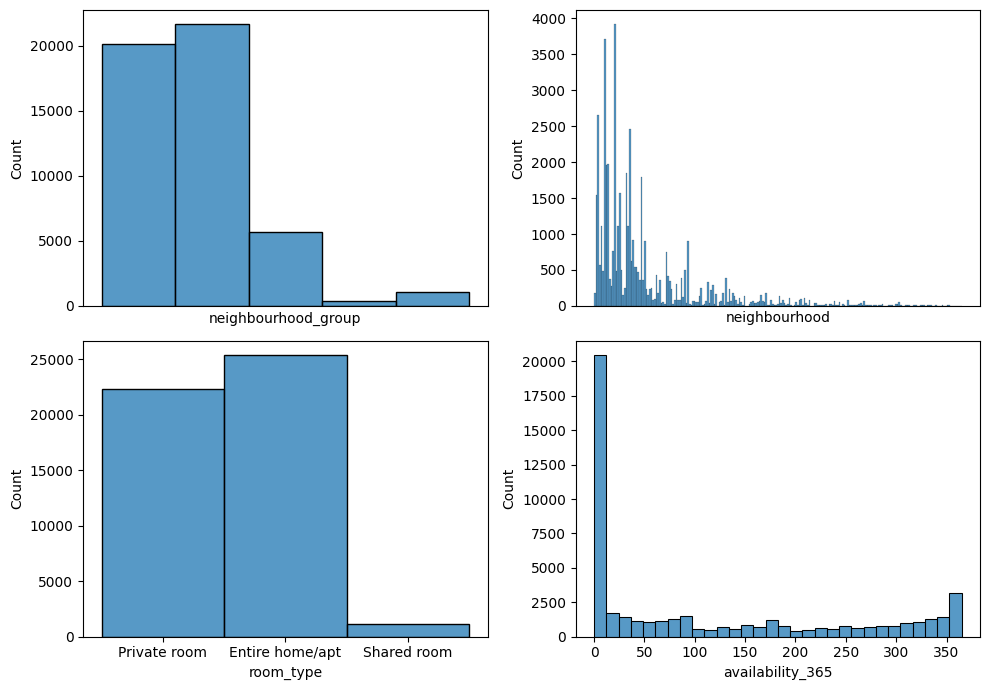

In [10]:
#ANALIZANDO LAS VARIABLES CATEGORICAS:

import matplotlib.pyplot as plt
import seaborn as sns

# cuadrícula de 2x2 porque solo son 4 graficas:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Histogramas:
sns.histplot(ax = axis[0,0], data = df, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,1], data = df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "room_type")
sns.histplot(ax = axis[1,1], data = df, x = "availability_365")

plt.tight_layout()
plt.show()

In [11]:
df['neighbourhood'].head()

0      Kensington
1         Midtown
2          Harlem
3    Clinton Hill
4     East Harlem
Name: neighbourhood, dtype: object

Para NEIGHBOURHOOD_GROUP los lugares de Manhattan y Brooklyn son los vecindarioS con la mayor cantidad de listados.

Para NEIGHBOURHOOD hay una gran variedad de vecindarios, y algunos como Harlem o Midtown tienen un número muy elevado de propiedades.

Para ROOM_TYPE los tipos de habitación más comunes son 'Entire home/apt' y 'Private room'.

Para AVAILABILITY_365 muchos listados no tienen disponibilidad, mientras que otros están disponibles durante todo el año.

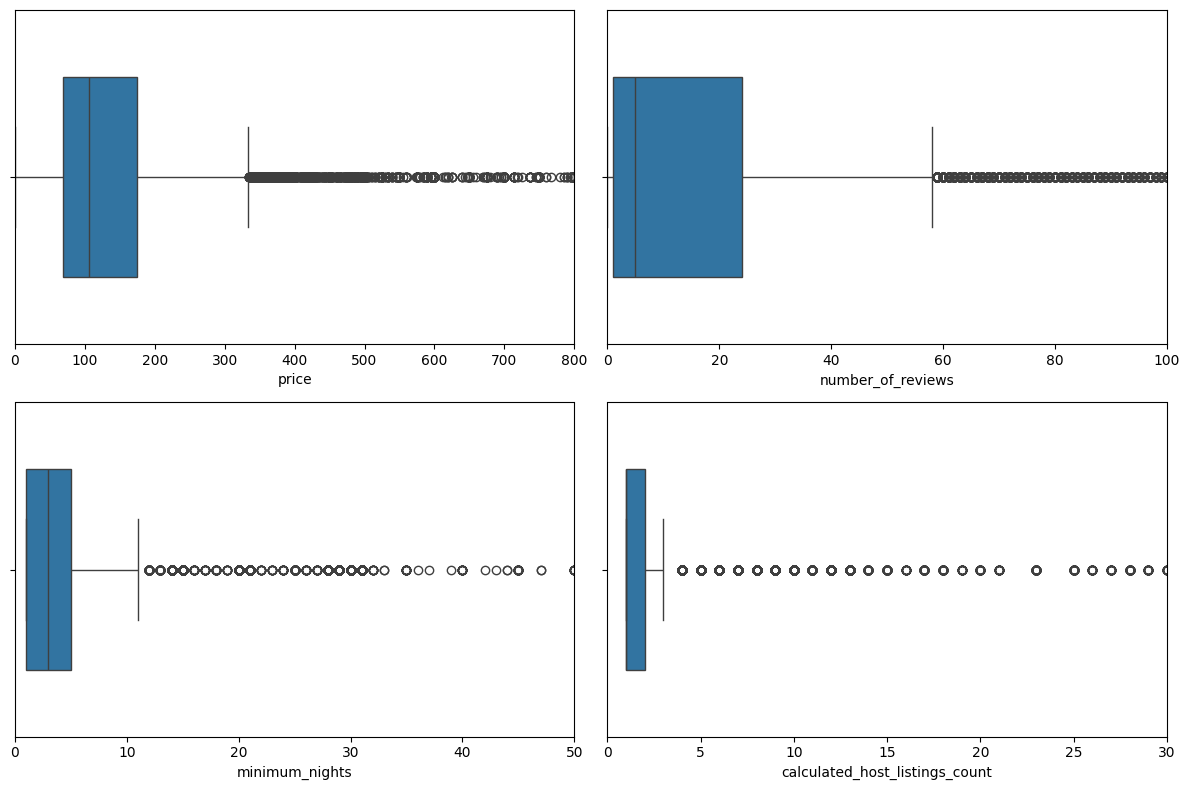

In [12]:
# ANALIZANDO LAS VARIABLES NUMERICAS:

import matplotlib.pyplot as plt
import seaborn as sns

# Quitamos el gridspec_kw que causaba el error de proporciones de altura
# Mantenemos el figsize y el width para el ancho de los boxplots.
fig, axis = plt.subplots(2, 2, figsize = (12,8))

sns.boxplot(ax = axis[0, 0], data = df,x= "price", width=0.6).set_xlim(0,800)
sns.boxplot(ax = axis[0, 1], data = df,x= "number_of_reviews", width=0.6).set_xlim(0,100)
sns.boxplot(ax = axis[1, 0], data = df,x= "minimum_nights", width=0.6).set_xlim(0,50)
sns.boxplot(ax = axis[1, 1], data = df,x= "calculated_host_listings_count", width=0.6).set_xlim(0,30)

plt.tight_layout()
plt.show()

Para PRICE, la mayoría de las propiedades son de bajo costo, pero hay muchas significativamente más caros (valores atípicos).

Para NUMBER_OF_REVIEWS hay muchas propiedades que tienen pocas reseñas, pero algunas otras tienen un numero realmente grande de ellas.

Para MINIMUN_NIGHTS la mayoría son de estancias cortas, pero algunas propiedades piden más noches (valores atípicos).

Para CALCULATED_HOST_LISTINGS_COUNT la mayoría de los dueños tienen solo una o pocas propiedades, pero existen dueños con un gran número de ellas.

In [13]:
# TABLA DE VALORES TIPICOS VS ATIPICOS DE VALORES CATEGORICOS VS NUMERICOS:

# Instalamos la libreria tableone y ponemos ">null" para evitar los mensajes de progreso.
%pip install tableone > null


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [16]:
from tableone import TableOne
import numpy as np

TableOne(df,
         nonnormal= ['price', 'minimum_nights'],
         categorical=['neighbourhood', 'room_type', 'availability_365'],
         groupby='neighbourhood_group',
         pval=True,
         htest_name=True)

#categoricas: "neighbourhood_group", "neighbourhood", "room_type", "availability_365"
#numericas: "price", "number_of_reviews", "minimum_nights", "calculated_host_listings_count"

Grouped by neighbourhood_group                                                                                                                                                                                                          
                                                                                            Missing                  Overall                     Bronx                 Brooklyn                Manhattan                   Queens            Staten Island P-Value                                       Test
n                                                                                                                      48895                      1091                    20104                    21661                     5666                      373                                                   
host_id, mean (SD)                                                                                0  67620010.6 (78610967.0)  105609881.0 (87079592.0)  56715259.5 (72600603.1)  67830617.5 (79364345.4)  96156799.5 (84243236.3)  98533597.7 (79543404.8)  <0.001                              One-way ANOVA
neighbourhood, n (%)                      Allerton                                                                  42 (0.1)                  42 (3.8)                  0 (0.0)                  0 (0.0)                  0 (0.0)                  0 (0.0)  <0.001  Chi-squared (warning: expected count < 5)
                                          Arden Heights                                                              4 (0.0)                   0 (0.0)                  0 (0.0)                  0 (0.0)                  0 (0.0)                  4 (1.1)                                                   
                                          Arrochar                                                                  21 (0.0)                   0 (0.0)                  0 (0.0)                  0 (0.0)                  0 (0.0)                 21 (5.6)                                                   
                                          Arverne                                                                   77 (0.2)                   0 (0.0)                  0 (0.0)                  0 (0.0)                 77 (1.4)                  0 (0.0)                                                   
                                          Astoria                                                                  900 (1.8)                   0 (0.0)                  0 (0.0)                  0 (0.0)               900 (15.9)                  0 (0.0)                                                   
                                          Bath Beach                                                                17 (0.0)                   0 (0.0)                 17 (0.1)                  0 (0.0)                  0 (0.0)                  0 (0.0)                                                   
                                          Battery Park City                                                         70 (0.1)                   0 (0.0)                  0 (0.0)                 70 (0.3)                  0 (0.0)                  0 (0.0)                                                   
                                          Bay Ridge                                                                141 (0.3)                   0 (0.0)                141 (0.7)                  0 (0.0)                  0 (0.0)                  0 (0.0)                                                   
                                          Bay Terrace                                                                6 (0.0)                   0 (0.0)                  0 (0.0)                  0 (0.0)                  6 (0.1)                  0 (0.0)                                                   
                                          Bay Terrace, Staten Island                                                 2 (0.0)                   

CONCLUSION:

Comparación entre vecindarios: La tabla muestra cómo varían características como el host ID, el neighbourhood_type, el room_type y (availability_365) en cada neighbourhood.

Estadísticas detalladas: Para las variables numéricas (como 'host_id', si se incluyeran en la salida, y 'price', 'minimum_nights' - resumidas con mediana y rango intercuartílico debido a su distribución no normal), se muestran sus promedios o medianas con su desviación estándar o rango intercuartílico respectivamente.

Para las variables categóricas ('neighbourhood_group', 'room_type', 'availability_365'), se muestran los recuentos y porcentajes dentro de cada vecindario.

(P-Value): indican si hay diferencias estadísticamente significativas entre los vecindarios para cada una de las variables analizadas. Un P-Value bajo (típicamente < 0.05) sugiere que las diferencias observadas entre los vecindarios no son por azar.